In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tickbars

In [4]:
raw_data = pd.read_csv('ESU13_tickdata.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%m/%d/%Y %H:%M:%S.%f')

In [5]:
imbalance = tickbars.tick_rule(data_indexed['price'])

In [6]:
dollar_volume_imbalance = imbalance*data_indexed['volume']*data_indexed['price']

In [7]:
ties = tickbars.ImbalanceEvents(dollar_volume_imbalance, 100000, dollar_volume_imbalance.mean().item(), 2*1e-5)

In [8]:
tick_imb_tevents = ties.get_events()

In [9]:
tick_imb_tevents['time'] = data_indexed.loc[tick_imb_tevents.index, 'time']
tick_imb_tevents['time'] = pd.to_datetime(tick_imb_tevents['time'], format='%m/%d/%Y %H:%M:%S.%f')
tick_imb_tevents

,threshold,time
tevent,,
3975,7.130882e+06,2013-09-01 17:41:03.230
44804,2.036558e+07,2013-09-02 07:34:09.259
312219,3.278288e+07,2013-09-03 10:27:34.431
785185,6.670344e+07,2013-09-04 10:07:32.380
987367,4.600804e+07,2013-09-04 16:13:09.192
1560998,5.657525e+07,2013-09-06 09:03:39.051
1697821,5.932916e+07,2013-09-06 10:00:20.287
1921445,4.985440e+07,2013-09-06 14:55:42.542
2206791,4.598020e+07,2013-09-09 13:15:20.944


In [10]:
statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})

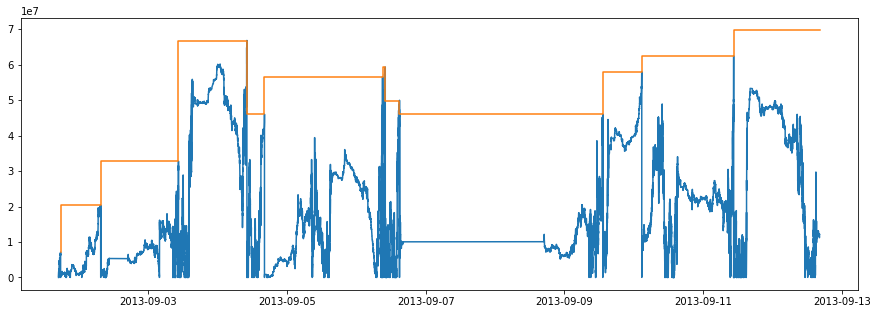

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(statistics['time'], statistics['value'])
plt.step(tick_imb_tevents['time'], tick_imb_tevents['threshold'], where='pre')
plt.show()

In [12]:
data_indexed['grp'] = 0
data_indexed.loc[tick_imb_tevents.index[:-1], 'grp'] = 1
data_indexed['grp'] = np.cumsum(data_indexed['grp'])
data_tick_vwap = tickbars.create_bars(data_indexed, 'grp', tickbars.compute_bar)

In [13]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-01 17:40:57.851,1640.25,1642.00,1639.00,1641.25,17452,1640.502707,2457.768,3975
1,2013-09-02 07:34:09.259,1641.50,1648.50,1639.75,1647.75,129738,1644.742340,49986.029,40829
2,2013-09-03 10:27:34.431,1647.75,1650.00,1639.50,1639.50,966171,1646.016588,96805.172,267415
3,2013-09-04 10:07:32.380,1639.50,1649.50,1630.75,1649.50,1873613,1638.376089,85197.949,472966
4,2013-09-04 16:13:09.187,1649.50,1655.00,1648.00,1655.00,910602,1651.829286,21936.807,202182
5,2013-09-06 09:03:39.051,1655.00,1663.50,1641.00,1641.00,2158190,1653.738034,147029.859,573631
6,2013-09-06 10:00:20.287,1641.00,1657.75,1638.75,1657.75,517178,1648.555541,3401.236,136823
7,2013-09-06 14:55:42.370,1657.75,1664.00,1654.25,1654.75,933334,1659.157587,17722.083,223624
8,2013-09-09 13:15:20.944,1654.75,1669.75,1652.00,1669.25,1150988,1661.480318,253178.402,285346
9,2013-09-10 02:44:59.526,1669.50,1674.75,1668.25,1674.75,492052,1670.433949,48578.582,106399


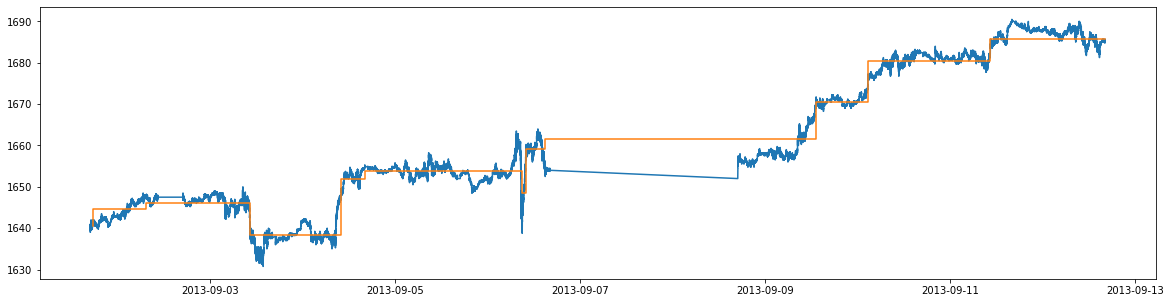

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price)
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre')
plt.show()